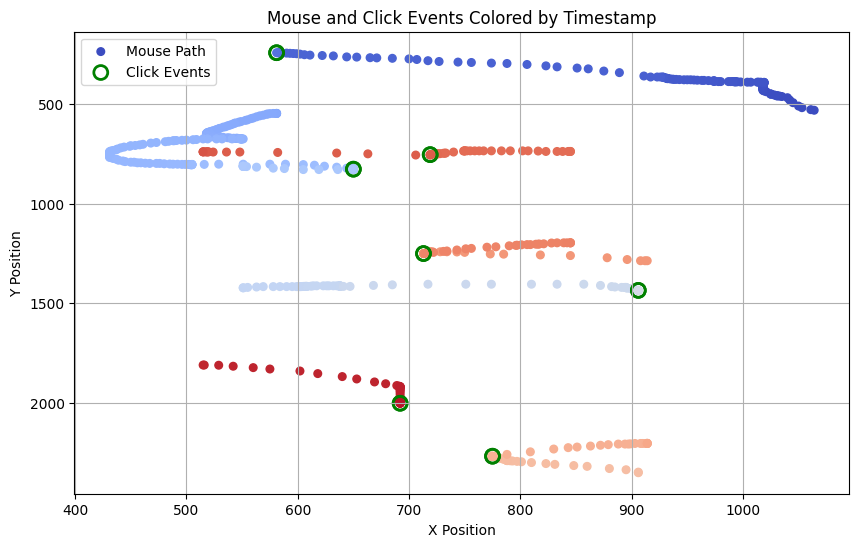

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Read the TSV files into Pandas DataFrames
mouse_data = pd.read_csv("mouse_positions.tsv", sep="\t")
click_data = pd.read_csv("click_positions.tsv", sep="\t")
scroll_data = pd.read_csv("scroll_positions.tsv", sep="\t")

# Modify scroll_data: rename 'scroll_position' to 'y'
scroll_data = scroll_data.rename(columns={'scroll_position': 'y'})

# Insert a new column 'x' with zeros at index 1 in scroll_data
scroll_data.insert(1, 'x', 0)

# Add a column for event type to all DataFrames
mouse_data['event_type'] = 'mouse'
click_data['event_type'] = 'click'
scroll_data['event_type'] = 'scroll'

# Concatenate the DataFrames into a single DataFrame and sort by timestamp
combined_df = pd.concat([mouse_data, click_data, scroll_data], ignore_index=True)

# Convert timestamp strings to datetime in Pandas for sorting
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'], format="%Y-%m-%d %H:%M:%S.%f")

# Sort the combined DataFrame by timestamp in ascending order
combined_df = combined_df.sort_values(by='timestamp').reset_index(drop=True)

# Initialize a variable to keep track of the cumulative scroll adjustment
cumulative_scroll = 0

# Adjust y values for mouse and click events based on scroll events
for index, row in combined_df.iterrows():
    if row['event_type'] == 'scroll':
        # Update new_scroll to the current scroll y value
        new_scroll = row['y']
        # Calculate the scroll delta
        scroll_delta = new_scroll - cumulative_scroll
        # Update cumulative_scroll for the next iteration
        cumulative_scroll = new_scroll
    elif row['event_type'] in ['mouse', 'click']:
        # Add the cumulative scroll value to the y position of mouse and click events
        combined_df.at[index, 'y'] += cumulative_scroll

# Filter the DataFrame to select only mouse and click events
mouse_events = combined_df[combined_df['event_type'] == 'mouse']
click_events = combined_df[combined_df['event_type'] == 'click']

# Normalize timestamps for color mapping
norm = mcolors.Normalize(combined_df['timestamp'].min().value, combined_df['timestamp'].max().value)

# Create a colormap using a color gradient from red to blue
colormap = cm.ScalarMappable(norm=norm, cmap='coolwarm')

# Plotting
plt.figure(figsize=(10, 6))

# Plot mouse movements with colors based on timestamps
plt.scatter(mouse_events['x'], mouse_events['y'], color=colormap.to_rgba(mouse_events['timestamp'].values.astype(float)), marker='o', s=30, label='Mouse Path')

# Plot click events as large green circles with no fill
plt.scatter(click_events['x'], click_events['y'], edgecolor='green', facecolor='none', marker='o', s=100, linewidth=2, label='Click Events')

# Invert the y-axis to place the origin at the top-left corner
plt.gca().invert_yaxis()

# Adding labels and title
plt.title('Mouse and Click Events Colored by Timestamp')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


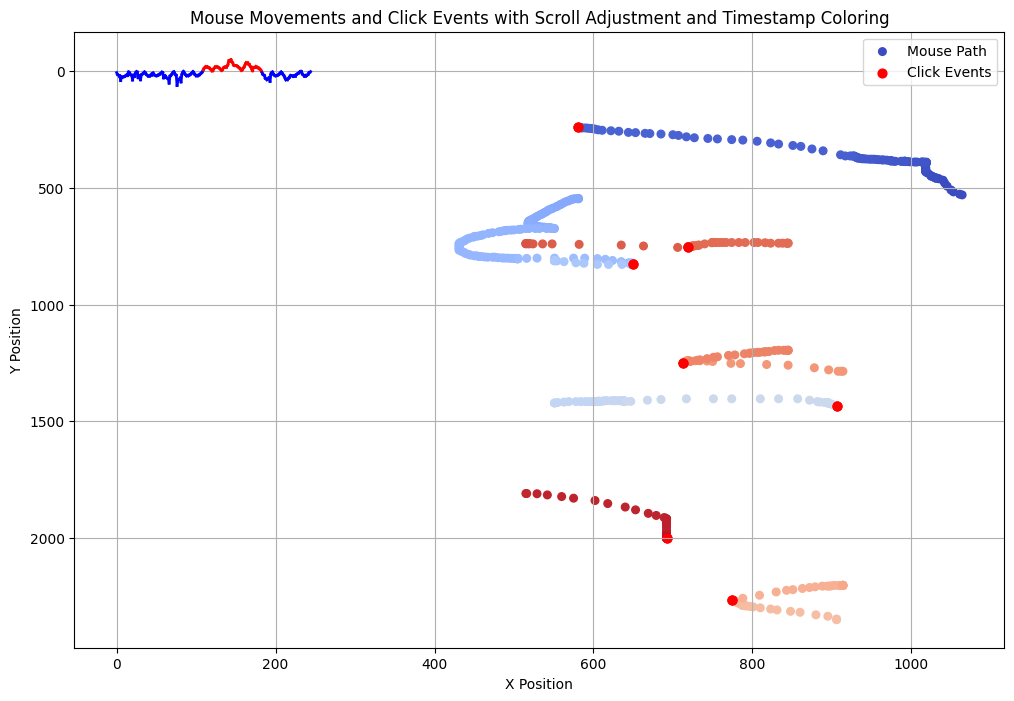

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Read the TSV files into Pandas DataFrames
mouse_data = pd.read_csv("mouse_positions.tsv", sep="\t")
click_data = pd.read_csv("click_positions.tsv", sep="\t")
scroll_data = pd.read_csv("scroll_positions.tsv", sep="\t")

# Modify scroll_data: rename 'scroll_position' to 'y'
scroll_data = scroll_data.rename(columns={'scroll_position': 'y'})

# Insert a new column 'x' with zeros at index 1 in scroll_data
scroll_data.insert(1, 'x', 0)

# Add a column for event type to all DataFrames
mouse_data['event_type'] = 'mouse'
click_data['event_type'] = 'click'
scroll_data['event_type'] = 'scroll'

# Concatenate the DataFrames into a single DataFrame and sort by timestamp
combined_df = pd.concat([mouse_data, click_data, scroll_data], ignore_index=True)

# Convert timestamp strings to datetime in Pandas for sorting
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'], format="%Y-%m-%d %H:%M:%S.%f")

# Sort the combined DataFrame by timestamp in ascending order
combined_df = combined_df.sort_values(by='timestamp').reset_index(drop=True)

# Initialize a variable to keep track of the cumulative scroll adjustment
cumulative_scroll = 0

# Adjust y values for mouse and click events based on scroll events
scroll_deltas = []  # To store scroll line segments
for index, row in combined_df.iterrows():
    if row['event_type'] == 'scroll':
        # Update new_scroll to the current scroll y value
        new_scroll = row['y']
        # Calculate the scroll delta
        scroll_delta = new_scroll - cumulative_scroll
        # Store the scroll delta for plotting
        scroll_deltas.append((row['timestamp'], scroll_delta))
        # Update cumulative_scroll for the next iteration
        cumulative_scroll = new_scroll
    elif row['event_type'] in ['mouse', 'click']:
        # Add the cumulative scroll value to the y position of mouse and click events
        combined_df.at[index, 'y'] += cumulative_scroll

# Filter the DataFrame to select only mouse and click events
mouse_events = combined_df[combined_df['event_type'] == 'mouse']
click_events = combined_df[combined_df['event_type'] == 'click']

# Plotting
plt.figure(figsize=(12, 8))

# Color map for mouse events based on timestamp
norm = plt.Normalize(combined_df['timestamp'].min().value, combined_df['timestamp'].max().value)
colors = plt.cm.coolwarm(norm(mouse_events['timestamp'].values.astype(float)))

# Plot mouse movements as dots colored by timestamp
plt.scatter(mouse_events['x'], mouse_events['y'], color=colors, marker='o', s=30, label='Mouse Path')

# Plot click events as red dots without connecting lines
plt.scatter(click_events['x'], click_events['y'], color='red', marker='o', s=40, label='Click Events')

# Plot scroll deltas as lines
for i in range(1, len(scroll_deltas)):
    start_time, start_delta = scroll_deltas[i - 1]
    end_time, end_delta = scroll_deltas[i]
    if start_delta > 0:  # Downward scroll
        plt.plot([i - 1, i], [start_delta, end_delta], color='blue', linestyle='-', linewidth=2)
    elif start_delta < 0:  # Upward scroll
        plt.plot([i - 1, i], [start_delta, end_delta], color='red', linestyle='-', linewidth=2)

# Invert the y-axis to place the origin at the top-left corner
plt.gca().invert_yaxis()

# Adding labels and title
plt.title('Mouse Movements and Click Events with Scroll Adjustment and Timestamp Coloring')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


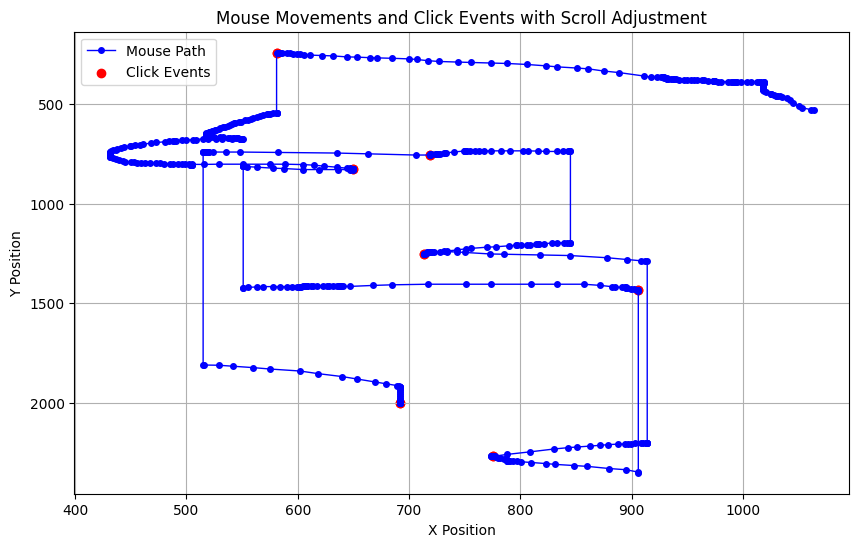

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the TSV files into Pandas DataFrames
mouse_data = pd.read_csv("mouse_positions.tsv", sep="\t")
click_data = pd.read_csv("click_positions.tsv", sep="\t")
scroll_data = pd.read_csv("scroll_positions.tsv", sep="\t")

# Modify scroll_data: rename 'scroll_position' to 'y'
scroll_data = scroll_data.rename(columns={'scroll_position': 'y'})

# Insert a new column 'x' with zeros at index 1 in scroll_data
scroll_data.insert(1, 'x', 0)

# Add a column for event type to all DataFrames
mouse_data['event_type'] = 'mouse'
click_data['event_type'] = 'click'
scroll_data['event_type'] = 'scroll'

# Concatenate the DataFrames into a single DataFrame and sort by timestamp
combined_df = pd.concat([mouse_data, click_data, scroll_data], ignore_index=True)

# Convert timestamp strings to datetime in Pandas for sorting
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'], format="%Y-%m-%d %H:%M:%S.%f")

# Sort the combined DataFrame by timestamp in ascending order
combined_df = combined_df.sort_values(by='timestamp').reset_index(drop=True)

# Initialize a variable to keep track of the cumulative scroll adjustment
cumulative_scroll = 0

# Adjust y values for mouse and click events based on scroll events
for index, row in combined_df.iterrows():
    if row['event_type'] == 'scroll':
        # Update new_scroll to the current scroll y value
        new_scroll = row['y']
        # Calculate the scroll delta
        scroll_delta = new_scroll - cumulative_scroll
        # Update cumulative_scroll for the next iteration
        cumulative_scroll = new_scroll
    elif row['event_type'] in ['mouse', 'click']:
        # Add the cumulative scroll value to the y position of mouse and click events
        combined_df.at[index, 'y'] += cumulative_scroll

# Filter the DataFrame to select only mouse and click events
mouse_events = combined_df[combined_df['event_type'] == 'mouse']
click_events = combined_df[combined_df['event_type'] == 'click']

# Plotting
plt.figure(figsize=(10, 6))

# Plot mouse movements as blue dots connected with lines
plt.plot(mouse_events['x'], mouse_events['y'], color='blue', marker='o', linestyle='-', linewidth=1, markersize=4, label='Mouse Path')

# Plot click events as red dots without connecting lines
plt.scatter(click_events['x'], click_events['y'], color='red', marker='o', label='Click Events')

# Invert the y-axis to place the origin at the top-left corner
plt.gca().invert_yaxis()

# Adding labels and title
plt.title('Mouse Movements and Click Events with Scroll Adjustment')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


# testing

In [ ]:
import pandas as pd

# Read the TSV files into Pandas DataFrames
mouse_data = pd.read_csv("mouse_positions.tsv", sep="\t")
click_data = pd.read_csv("click_positions.tsv", sep="\t")
scroll_data = pd.read_csv("scroll_positions.tsv", sep="\t")

# Modify scroll_data: rename 'scroll_position' to 'y'
scroll_data = scroll_data.rename(columns={'scroll_position': 'y'})

# Insert a new column 'x' with zeros at index 1 in scroll_data
scroll_data.insert(1, 'x', 0)

# Add a column for event type to all DataFrames
mouse_data['event_type'] = 'mouse'
click_data['event_type'] = 'click'
scroll_data['event_type'] = 'scroll'

# Concatenate the DataFrames into a single DataFrame and sort by timestamp
combined_df = pd.concat([mouse_data, click_data, scroll_data], ignore_index=True)

# Convert timestamp strings to datetime in Pandas for sorting
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'], format="%Y-%m-%d %H:%M:%S.%f")

# Sort the combined DataFrame by timestamp in ascending order
combined_df = combined_df.sort_values(by='timestamp').reset_index(drop=True)

# Print the combined and sorted DataFrame
print(combined_df.head())

# Check the structure of the combined DataFrame
print(combined_df.info())


In [19]:
mouse_data.y.max()

np.int64(248)

In [20]:
click_data.y.max()

np.int64(241)

In [21]:
scroll_data.y.max()

np.float64(1989.0)

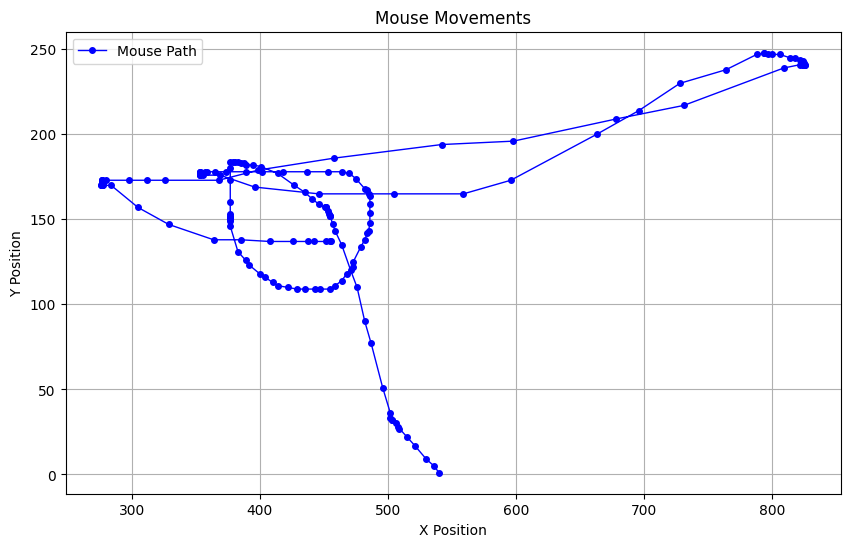

In [22]:
import matplotlib.pyplot as plt

# Filter the DataFrame to select only mouse events
mouse_events = combined_df[combined_df['event_type'] == 'mouse']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mouse_events['x'], mouse_events['y'], color='blue', marker='o', linestyle='-', linewidth=1, markersize=4, label='Mouse Path')

# Adding labels and title
plt.title('Mouse Movements')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

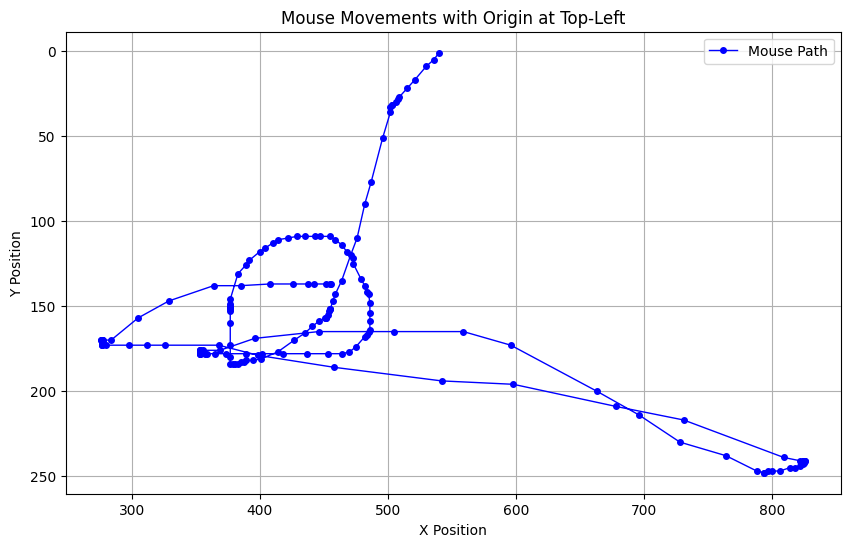

In [23]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mouse_events['x'], mouse_events['y'], color='blue', marker='o', linestyle='-', linewidth=1, markersize=4, label='Mouse Path')

# Invert the y-axis to place the origin at the top-left corner
plt.gca().invert_yaxis()

# Adding labels and title
plt.title('Mouse Movements with Origin at Top-Left')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [24]:
mouse_events.y.max()

np.float64(248.0)

In [12]:
# Initialize a variable to keep track of the cumulative scroll adjustment
cumulative_scroll = 0

# Adjust y values for mouse and click events based on scroll events
for index, row in combined_df.iterrows():
    if row['event_type'] == 'scroll':
        # Incrementally add the scroll y value to the cumulative scroll
        cumulative_scroll += row['y']
    elif row['event_type'] in ['mouse', 'click']:
        # Add the cumulative scroll value to the y position of mouse and click events
        combined_df.at[index, 'y'] += cumulative_scroll


In [25]:
# Initialize variables to keep track of scroll changes
old_scroll = 0

# Adjust y values for mouse and click events based on scroll events
for index, row in combined_df.iterrows():
    if row['event_type'] == 'scroll':
        # Update new_scroll to the current scroll y value
        new_scroll = row['y']
        # Calculate the scroll delta
        scroll_delta = new_scroll - old_scroll
        # Update old_scroll for the next iteration
        old_scroll = new_scroll
    elif row['event_type'] in ['mouse', 'click']:
        # Add the scroll delta to the y position of mouse and click events
        combined_df.at[index, 'y'] += old_scroll


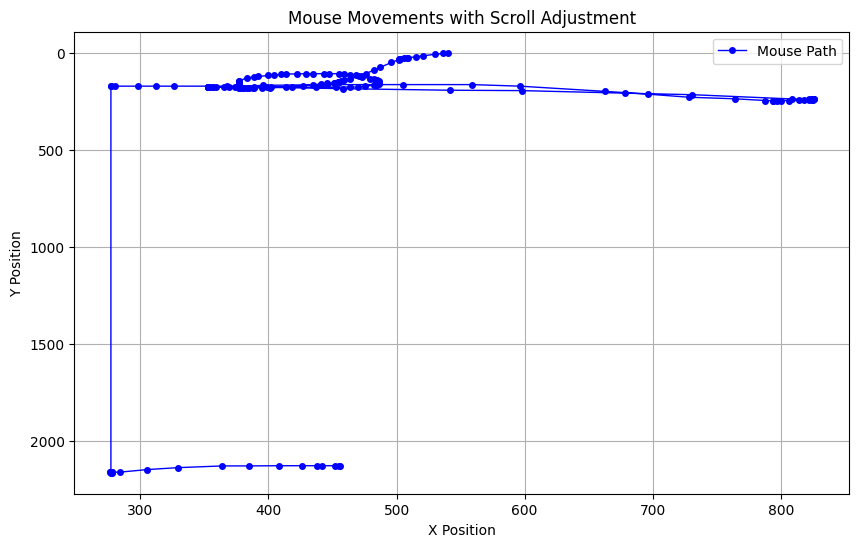

In [26]:
# Filter the DataFrame to select only mouse events
mouse_events = combined_df[combined_df['event_type'] == 'mouse']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mouse_events['x'], mouse_events['y'], color='blue', marker='o', linestyle='-', linewidth=1, markersize=4, label='Mouse Path')

# Invert the y-axis to place the origin at the top-left corner
plt.gca().invert_yaxis()

# Adding labels and title
plt.title('Mouse Movements with Scroll Adjustment')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [14]:
cumulative_scroll

39332.25

In [15]:
scroll_data

,url,x,y,user,timestamp,event_type
0,file:///home/sol-nhl/dev/cce-web/web/py/index....,0,3.00,some-string,2024-08-05 14:27:38.185,scroll
1,file:///home/sol-nhl/dev/cce-web/web/py/index....,0,13.50,some-string,2024-08-05 14:27:38.201,scroll
2,file:///home/sol-nhl/dev/cce-web/web/py/index....,0,30.00,some-string,2024-08-05 14:27:38.216,scroll
3,file:///home/sol-nhl/dev/cce-web/web/py/index....,0,66.75,some-string,2024-08-05 14:27:38.235,scroll
4,file:///home/sol-nhl/dev/cce-web/web/py/index....,0,84.75,some-string,2024-08-05 14:27:38.267,scroll
5,file:///home/sol-nhl/dev/cce-web/web/py/index....,0,102.75,some-string,2024-08-05 14:27:38.285,scroll
6,file:///home/sol-nhl/dev/cce-web/web/py/index....,0,119.25,some-string,2024-08-05 14:27:38.304,scroll
7,file:///home/sol-nhl/dev/cce-web/web/py/index....,0,132.00,some-string,2024-08-05 14:27:38.316,scroll
8,file:///home/sol-nhl/dev/cce-web/web/py/index....,0,143.25,some-string,2024-08-05 14:27:38.334,scroll
9,file:///home/sol-nhl/dev/cce-web/web/py/index....,0,150.00,some-string,2024-08-05 14:27:38.364,scroll


In [27]:
print(combined_df)

                                                   url    x       y  \
0    file:///home/sol-nhl/dev/cce-web/web/py/index....  540     1.0   
1    file:///home/sol-nhl/dev/cce-web/web/py/index....  536     5.0   
2    file:///home/sol-nhl/dev/cce-web/web/py/index....  530     9.0   
3    file:///home/sol-nhl/dev/cce-web/web/py/index....  521    17.0   
4    file:///home/sol-nhl/dev/cce-web/web/py/index....  515    22.0   
..                                                 ...  ...     ...   
230  file:///home/sol-nhl/dev/cce-web/web/py/index....  442  2126.0   
231  file:///home/sol-nhl/dev/cce-web/web/py/index....  452  2126.0   
232  file:///home/sol-nhl/dev/cce-web/web/py/index....  455  2126.0   
233  file:///home/sol-nhl/dev/cce-web/web/py/index....  456  2126.0   
234  file:///home/sol-nhl/dev/cce-web/web/py/index....  456  2126.0   

            user               timestamp event_type  
0    some-string 2024-08-05 14:27:31.581      mouse  
1    some-string 2024-08-05 14:27:31.58

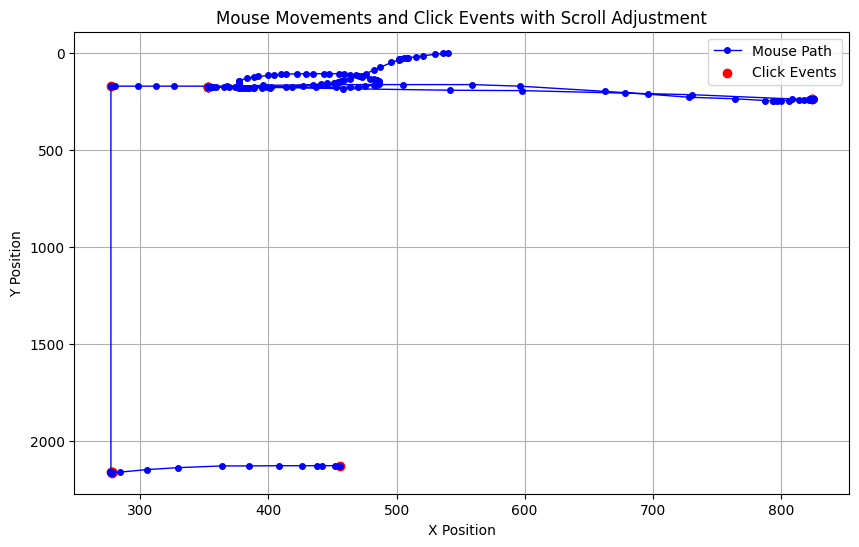

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the TSV files into Pandas DataFrames
mouse_data = pd.read_csv("mouse_positions.tsv", sep="\t")
click_data = pd.read_csv("click_positions.tsv", sep="\t")
scroll_data = pd.read_csv("scroll_positions.tsv", sep="\t")

# Modify scroll_data: rename 'scroll_position' to 'y'
scroll_data = scroll_data.rename(columns={'scroll_position': 'y'})

# Insert a new column 'x' with zeros at index 1 in scroll_data
scroll_data.insert(1, 'x', 0)

# Add a column for event type to all DataFrames
mouse_data['event_type'] = 'mouse'
click_data['event_type'] = 'click'
scroll_data['event_type'] = 'scroll'

# Concatenate the DataFrames into a single DataFrame and sort by timestamp
combined_df = pd.concat([mouse_data, click_data, scroll_data], ignore_index=True)

# Convert timestamp strings to datetime in Pandas for sorting
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'], format="%Y-%m-%d %H:%M:%S.%f")

# Sort the combined DataFrame by timestamp in ascending order
combined_df = combined_df.sort_values(by='timestamp').reset_index(drop=True)

# Initialize variables to keep track of scroll changes
old_scroll = 0

# Adjust y values for mouse and click events based on scroll events
for index, row in combined_df.iterrows():
    if row['event_type'] == 'scroll':
        # Update new_scroll to the current scroll y value
        new_scroll = row['y']
        # Calculate the scroll delta
        scroll_delta = new_scroll - old_scroll
        # Update old_scroll for the next iteration
        old_scroll = new_scroll
    elif row['event_type'] in ['mouse', 'click']:
        # Add the scroll delta to the y position of mouse and click events
        combined_df.at[index, 'y'] += old_scroll

# Filter the DataFrame to select only mouse and click events
mouse_events = combined_df[combined_df['event_type'] == 'mouse']
click_events = combined_df[combined_df['event_type'] == 'click']

# Plotting
plt.figure(figsize=(10, 6))

# Plot mouse movements as blue dots connected with lines
plt.plot(mouse_events['x'], mouse_events['y'], color='blue', marker='o', linestyle='-', linewidth=1, markersize=4, label='Mouse Path')

# Plot click events as red dots without connecting lines
plt.scatter(click_events['x'], click_events['y'], color='red', marker='o', label='Click Events')

# Invert the y-axis to place the origin at the top-left corner
plt.gca().invert_yaxis()

# Adding labels and title
plt.title('Mouse Movements and Click Events with Scroll Adjustment')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()
